<font size="6"><b>Data Cleaning and Preprocessing - Part II</b></font>

![Figure_4](img/Figure_4.png)

This is a short notebook done to prepare the dataframe that will be used for all the Modeling and it will contain the same information than the df1 dataframe, but filtered to the top 20 destination in terms on numbers of flights

# Libraries

Not many libraries are needed for this notebook. I will import Pandas and numpy but I might just end up using pandas as this notebook is basically modifying dataframes to end up with the desire model input

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

pd.set_option('display.max_columns', None)
import datetime, warnings
warnings.filterwarnings("ignore")

# Data Loading

In [2]:
df = pd.read_csv('df1.csv', index_col=0)
df.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,MONTH_AB,FLIGHT_STATUS
0,2018-01-01,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,1,1,Jan,0
1,2018-01-01,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,1,1,Jan,0
2,2018-01-01,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846.0,1,1,Jan,0
3,2018-01-01,United Airlines,Ft. Myers,Chicago,3,6.0,19.0,3,3,6.0,3,-2.0,190.0,182.0,157.0,1120.0,1,1,Jan,0
4,2018-01-01,United Airlines,Chicago,Albany,2,20.0,13.0,2,2,10.0,2,14.0,112.0,106.0,83.0,723.0,1,1,Jan,1


In [3]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df['WEEKDAY'] = df['FL_DATE'].dt.dayofweek

In [4]:
df.WEEKDAY.value_counts()

0    1065950
4    1055888
3    1048350
2    1023447
1    1010928
6    1006790
5     865052
Name: WEEKDAY, dtype: int64

In [5]:
df.head(3)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,MONTH_AB,FLIGHT_STATUS,WEEKDAY
0,2018-01-01,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,1,1,Jan,0,0
1,2018-01-01,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,1,1,Jan,0,0
2,2018-01-01,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846.0,1,1,Jan,0,0


<b>WEEKDAY GLOSSARY</b>

* 0 = Monday
* 1 = Tuesday
* 2 = Weednesday
* 3 = Thursday
* 4 = Friday
* 5 = Saturday
* 6 = Sunday

# Preprocessing

Even though a lot of pre-processing and cleaning has been done on a separate notebook, this one will be only aiming to obtain a final dataframe for the modeling which will have the top 20 cities only. The reason to do it this way is because the DEST feature is a categorical column of 358 values. The hot encoding will then be done for this 20 instead of the 358 total destinations.  

The way how I will do this is first with a .value_counts of the DEST (destination city) and them from here create a DataFrame with only those two columns

In [6]:
df.DEST.value_counts().iloc[:20]

Chicago              409732
Atlanta              386390
New York             288598
Dallas-Fort Worth    272147
Denver               233411
Houston              228072
Charlotte            226110
Los Angeles          219261
Phoenix              177171
San Francisco        173016
Las Vegas            159801
Minneapolis          157251
Detroit              155612
Orlando              145837
Boston               144121
Seattle              138969
Newark               138622
Arlington            128172
Philadelphia         113394
Salt Lake City       112570
Name: DEST, dtype: int64

In [7]:
top_cities = df.DEST.value_counts().iloc[0:20].rename_axis('DEST').reset_index(name='TOTAL_FLIGHTS')
top_cities.head()

,DEST,TOTAL_FLIGHTS
0,Chicago,409732
1,Atlanta,386390
2,New York,288598
3,Dallas-Fort Worth,272147
4,Denver,233411


In [8]:
# Checking the cities within the numpy array just to verify that it worked
top_cities.DEST.unique()

array(['Chicago', 'Atlanta', 'New York', 'Dallas-Fort Worth', 'Denver',
       'Houston', 'Charlotte', 'Los Angeles', 'Phoenix', 'San Francisco',
       'Las Vegas', 'Minneapolis', 'Detroit', 'Orlando', 'Boston',
       'Seattle', 'Newark', 'Arlington', 'Philadelphia', 'Salt Lake City'],
      dtype=object)

In [9]:
# Creating a list with top 20 cities only:
city_list = top_cities['DEST'].tolist()

In [10]:
# Checking the list's content
city_list

['Chicago',
 'Atlanta',
 'New York',
 'Dallas-Fort Worth',
 'Denver',
 'Houston',
 'Charlotte',
 'Los Angeles',
 'Phoenix',
 'San Francisco',
 'Las Vegas',
 'Minneapolis',
 'Detroit',
 'Orlando',
 'Boston',
 'Seattle',
 'Newark',
 'Arlington',
 'Philadelphia',
 'Salt Lake City']

Now that it looks ok, I will use this list to filter the main dataframe (df) and create a new one called dfm which stands for "datafame for modeling"

In [11]:
boolean_series = df.DEST.isin(city_list)
dfm = df[boolean_series]
dfm.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,MONTH_AB,FLIGHT_STATUS,WEEKDAY
0,2018-01-01,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,1,1,Jan,0,0
1,2018-01-01,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,1,1,Jan,0,0
2,2018-01-01,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846.0,1,1,Jan,0,0
3,2018-01-01,United Airlines,Ft. Myers,Chicago,3,6.0,19.0,3,3,6.0,3,-2.0,190.0,182.0,157.0,1120.0,1,1,Jan,0,0
6,2018-01-01,United Airlines,Houston,Las Vegas,2,-3.0,14.0,2,2,6.0,2,-16.0,206.0,193.0,173.0,1222.0,1,1,Jan,0,0


Now, let's check the unique values in the DEST column and they should match my previously created list (city_list):

In [12]:
dfm.DEST.unique()

array(['Denver', 'San Francisco', 'Chicago', 'Las Vegas', 'Newark',
       'Atlanta', 'Los Angeles', 'Houston', 'Salt Lake City', 'Orlando',
       'Detroit', 'Charlotte', 'Boston', 'Phoenix', 'Minneapolis',
       'Dallas-Fort Worth', 'New York', 'Philadelphia', 'Arlington',
       'Seattle'], dtype=object)

In [13]:
dfm.DEST.value_counts()

Chicago              409732
Atlanta              386390
New York             288598
Dallas-Fort Worth    272147
Denver               233411
Houston              228072
Charlotte            226110
Los Angeles          219261
Phoenix              177171
San Francisco        173016
Las Vegas            159801
Minneapolis          157251
Detroit              155612
Orlando              145837
Boston               144121
Seattle              138969
Newark               138622
Arlington            128172
Philadelphia         113394
Salt Lake City       112570
Name: DEST, dtype: int64

In [14]:
dfm.shape # New dataframe ready reduced to almost half the size of the original one

(4008257, 21)

In [15]:
df.shape # Previous dataframe before this final filter

(7076405, 21)

Because I only chose the top 20 cities you can see how the size of the dataframe has reduced itself to almost half its original size, going from 7.07 million rows to just over 4 million. this is not a negative thing as 4 million is still a large number of row and we are considering 20 cities only out of 358.

Before this dataframe is saved I need to review the type of each columns and try to minimize the categoricals when possible. The reason for this is because as we know a categorical variable is a variable whose values take on the value of labels and Machine learning algorithms and deep learning neural networks require that input and output variables are numbers. This means that categorical data must be encoded to numbers before we can use it to fit and evaluate a model

So lets see first which ones I have to deal with:

In [16]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4008257 entries, 0 to 7213445
Data columns (total 21 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   ORIGIN               object        
 3   DEST                 object        
 4   CRS_DEP_TIME         int64         
 5   DEP_DELAY            float64       
 6   TAXI_OUT             float64       
 7   WHEELS_OFF           int64         
 8   WHEELS_ON            int64         
 9   TAXI_IN              float64       
 10  CRS_ARR_TIME         int64         
 11  ARR_DELAY            float64       
 12  CRS_ELAPSED_TIME     float64       
 13  ACTUAL_ELAPSED_TIME  float64       
 14  AIR_TIME             float64       
 15  DISTANCE             float64       
 16  DAY                  int64         
 17  MONTH                int64         
 18  MONTH_AB             object        
 19  FLIGHT_STATUS        

First step i to get rid of columns that I won't be using:<br>

I did some research to what are the 15 real reasons for flights being delayed, and surprisingly to me many of the ones that I have on my dataframe aren't. Therefore, before I drop some of my features, take a minute to go over this list so that you can better understand why I dropped some of them:

1. Air traffic control<br>
2. Adverse weather<br>
3. Bird strikes<br>
4. Knock-on effect<br>
5. Strikes<br>
6. Connecting passengers<br>
7. Connecting bags<br>
8. Cargo<br>
9. Waiting for crew<br>
10. Crew rest requirements<br>
11. Catering<br>
12. Security clearance<br>
13. Aircraft preparations<br>
14. Mechanical issue<br>
15. Weight restrictions<br>

source: <a href="https://www.claimcompass.eu/blog/why-is-my-flight-delayed/">Link</a>



* FLIGHT_DATE: This is a categorial and I really don't need it as I have the DAY and MONTH<br>
* TAXI_OUT, WHEELS_OFF, WHEELS_ON, and TAXI_ON<br>
* DAY: During the EDA I saw that it doesn't have much of an impact. Maybe the day of the week and the time do, but I didn't go into that detail due to time constraint.


After analysing the data for quite some time I realized that the content of the DEP_TIME (departure time) and ARR_TIME (arrival time) variables can be a bit misleading since they don't contain the dates. To explain my point let's assume a schedule departure at 0h05 on the 1st of the month, but then the departure time says 23h50. What really happened here? is there a 23 hour and 45 minute delay? or did the flight leave 15 minutes earlier? Now look at the DEP_DELAY and ARR_DELAY. Both of these are more informative because they give us directly the delay in minutes. So in my example the Departure Delay would be -15 min telling us that the flight left early. With this said I will not be keeping the Departure and Arrival Time.  

In [17]:
dfm = dfm.drop(columns=['FL_DATE', 'MONTH_AB'])

I'm dropping thee ARR_DELAY as it has been replaced by the FLIGHT_STATUS, therefore we don't need it anymore...

In [18]:
dfm.head()

,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,FLIGHT_STATUS,WEEKDAY
0,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,1,1,0,0
1,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,1,1,0,0
2,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846.0,1,1,0,0
3,United Airlines,Ft. Myers,Chicago,3,6.0,19.0,3,3,6.0,3,-2.0,190.0,182.0,157.0,1120.0,1,1,0,0
6,United Airlines,Houston,Las Vegas,2,-3.0,14.0,2,2,6.0,2,-16.0,206.0,193.0,173.0,1222.0,1,1,0,0


In [19]:
dfm.shape

(4008257, 19)

Now all that is needed is to save this dataframe as a .csv file and open it in my next notebook

In [20]:
dfm.to_csv('dfm.csv')

# Collinearity Check

Now with this reduced and cleaned dataframe it is time to look at how these features correlate to each others, and then I'll deal with the Categoricals

In [21]:
dfm.corr()

,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,FLIGHT_STATUS,WEEKDAY
CRS_DEP_TIME,1.000000,0.099024,-0.000949,0.897875,0.592394,0.004020,0.620988,0.088945,0.069142,0.065923,0.067200,0.068013,-0.000032,-0.002569,0.120484,0.006769
DEP_DELAY,0.099024,1.000000,0.062459,0.140688,0.067340,0.007446,0.091863,0.957497,0.008945,0.013649,0.004868,0.005024,-0.007438,0.000027,0.384192,-0.008565
TAXI_OUT,-0.000949,0.062459,1.000000,0.039977,0.027169,0.027101,0.016721,0.222529,0.085070,0.193347,0.060495,0.045182,-0.005435,-0.007684,0.308756,-0.030141
WHEELS_OFF,0.897875,0.140688,0.039977,1.000000,0.654369,0.008626,0.657519,0.136747,0.043956,0.046093,0.040981,0.036950,-0.001325,-0.005115,0.162225,0.003395
WHEELS_ON,0.592394,0.067340,0.027169,0.654369,1.000000,0.031949,0.891347,0.069452,0.034563,0.038272,0.032603,0.022654,-0.001135,-0.002196,0.116218,0.002471
TAXI_IN,0.004020,0.007446,0.027101,0.008626,0.031949,1.000000,0.028985,0.112678,0.038513,0.108535,0.017110,0.009088,-0.002193,0.014372,0.166829,0.001510
CRS_ARR_TIME,0.620988,0.091863,0.016721,0.657519,0.891347,0.028985,1.000000,0.086667,0.042175,0.041875,0.037965,0.030030,-0.000917,0.000240,0.112142,0.003297
ARR_DELAY,0.088945,0.957497,0.222529,0.136747,0.069452,0.112678,0.086667,1.000000,-0.023492,0.035965,-0.003386,-0.022180,-0.009072,0.009705,0.504177,-0.015353
CRS_ELAPSED_TIME,0.069142,0.008945,0.085070,0.043956,0.034563,0.038513,0.042175,-0.023492,1.000000,0.981824,0.989392,0.982884,0.000945,-0.008652,0.003879,0.012800
ACTUAL_ELAPSED_TIME,0.065923,0.013649,0.193347,0.046093,0.038272,0.108535,0.041875,0.035965,0.981824,1.000000,0.987066,0.967998,-0.000380,-0.002268,0.095917,0.008067


In [22]:
abs(dfm.corr())>.75

,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,FLIGHT_STATUS,WEEKDAY
CRS_DEP_TIME,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
DEP_DELAY,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
TAXI_OUT,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
WHEELS_OFF,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
WHEELS_ON,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
TAXI_IN,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
CRS_ARR_TIME,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
ARR_DELAY,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
CRS_ELAPSED_TIME,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False
ACTUAL_ELAPSED_TIME,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False


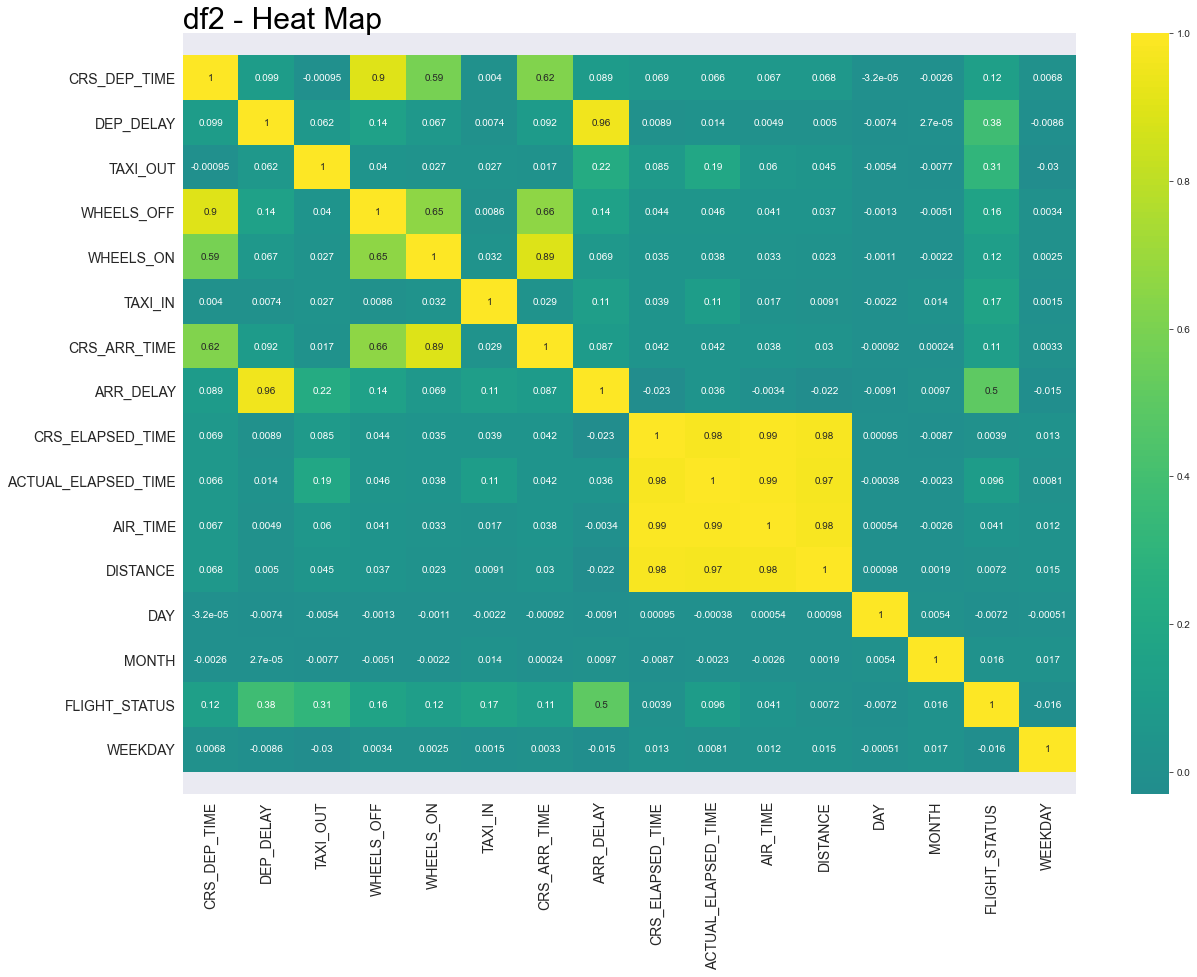

In [23]:
plt.figure(figsize=(20,14))
ax = sns.heatmap(dfm.corr(), cmap='viridis', center=0, annot=True)
bottom, top = ax.get_ylim()
plt.text(0,-0.6, "df2 - Heat Map", fontsize = 30, color='Black', fontstyle='normal')
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

The missing features are the categorical ones so I will deal with those directly in the Modeling notebook. Here what I am going to do is reduce the possibility if collinearity. I set up a threshold at 75% on the correlation matrix and as you can see I got as output points at the following:

1. ARR_DELAY with DEP_DELAY<br>
2. CRS_ELAPSED_TIME with DISTANCE<br>
3. ACTUAL_ELAPSED_TIME with CRS_ELAPSED_TIME
4. DISTANCE with ACTUAL_ELAPSED_TIME

And there is a possible multicollinearity with relationship 2, 3, and 4



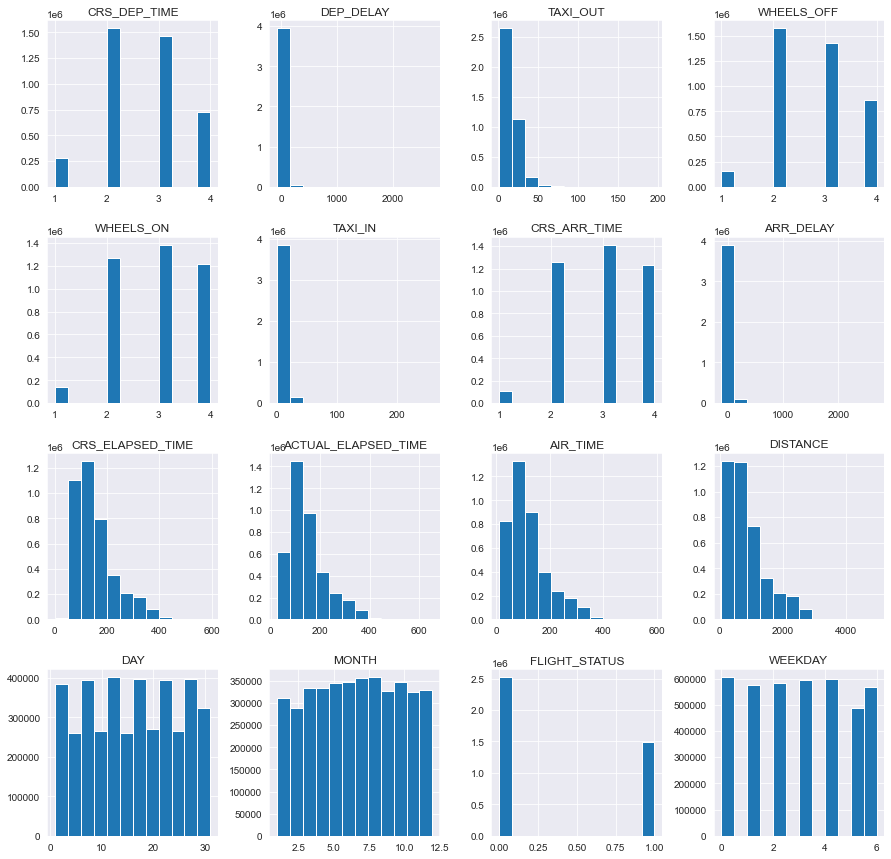

In [24]:
dfm.hist(figsize  = [15, 15],bins=12) 
plt.show()

In [25]:
dfm_jan = dfm[(dfm['MONTH'] == 1)]
dfm_jan.head()

,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,FLIGHT_STATUS,WEEKDAY
0,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,1,1,0,0
1,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,1,1,0,0
2,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846.0,1,1,0,0
3,United Airlines,Ft. Myers,Chicago,3,6.0,19.0,3,3,6.0,3,-2.0,190.0,182.0,157.0,1120.0,1,1,0,0
6,United Airlines,Houston,Las Vegas,2,-3.0,14.0,2,2,6.0,2,-16.0,206.0,193.0,173.0,1222.0,1,1,0,0


In [26]:
dfm_jan.MONTH.value_counts()

1    312379
Name: MONTH, dtype: int64

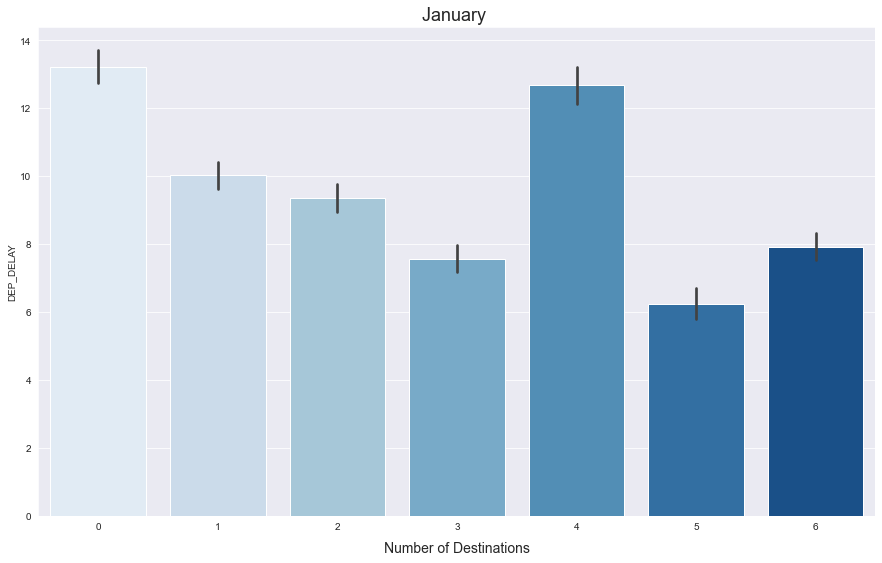

In [27]:
sns.set_style('darkgrid')

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="WEEKDAY", y="DEP_DELAY", data=dfm_jan, palette="Blues")
plt.title('January ', fontsize=18)
plt.xlabel('Number of Destinations', fontsize=14, labelpad=10);
plt.show()